In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn.metrics
import yaml
from pathlib import Path
import LinearClassifier as lc

In [2]:
X = np.load(f"training_set.npz", allow_pickle = True)['x']
y = np.load(f"training_set_labels.npz", allow_pickle = True)['y']

### Trial 1 (Dataset 1)

In [3]:
#X = np.mean(X, axis = 1)

In [ ]:
#model = lc.LinearClassifier(num_features = X.shape[1])

In [14]:
#loss = model.fit(X, y, n_epochs=10, batch_size=30)

In [15]:
#loss2 = [m.detach().numpy() for m in loss]

In [16]:
#x = torch.tensor(X, dtype = torch.float32)
#y_pred = model.predict(x).detach().numpy()

In [18]:
#conf = yaml.safe_load(Path("keren/meta.yaml").read_text())
#meta_cell_types = conf["cell_types"]

In [19]:
#labels = list(meta_cell_types.values())[1:]

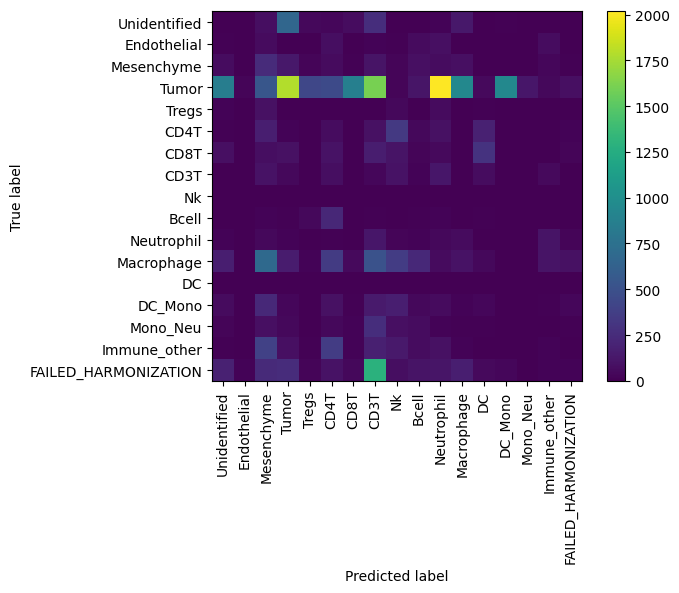

In [20]:
#disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    # np.argmax(y,axis = 1), 
    # np.argmax(y_pred, axis = 1), 
    # display_labels = labels,
    # include_values = False,
    # xticks_rotation = 90
#)

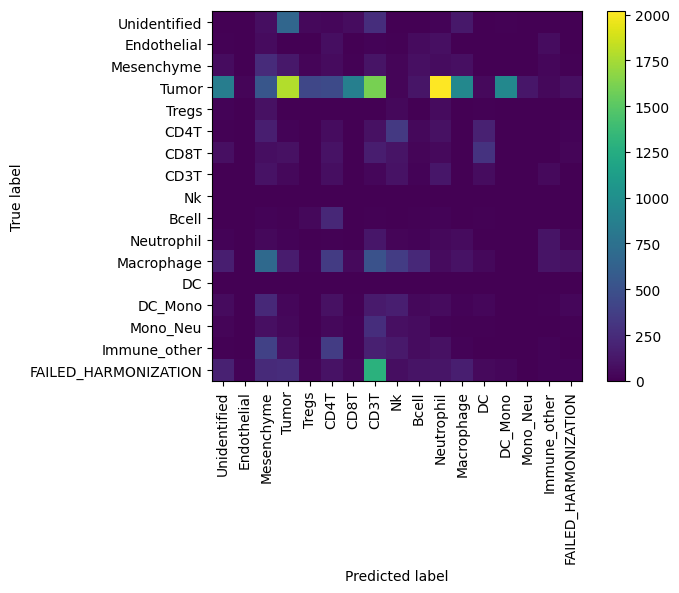

This confusion matrix shows that the machine is classifying almost everything as a tumor cell. We take a look at the distribution of cell types below.

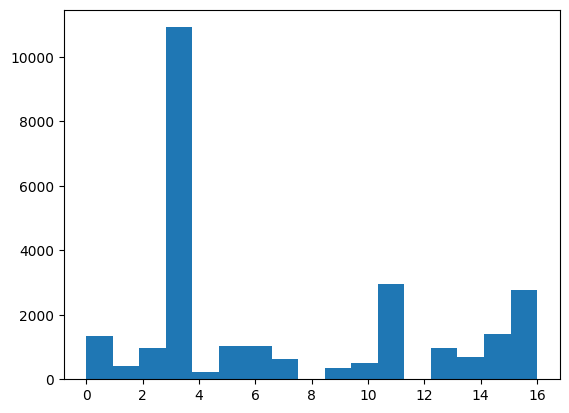

In [89]:
#plt.hist(np.argmax(y, axis = 1), bins = 17);

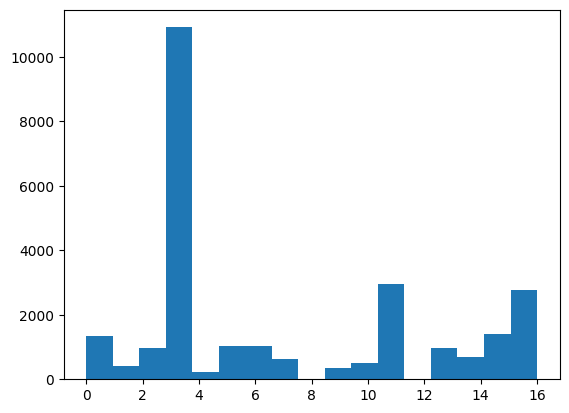

There are significantly more tumor cells than any other cell type! I will adjust the training set to limit tumor cells

### Trial 2 (Dataset 2)

For each given cell, average the expression of each given marker

In [35]:
X = np.mean(X, axis = 1)

Initialize the model

In [36]:
model = lc.LinearClassifier(num_features = X.shape[1], num_classes = 15)

Fit the model

In [37]:
loss = model.fit(X, y, n_epochs=10, batch_size=30)

Use the trained model to predict data. We use it to predict the training data X. Though normally you would test data that was set aside for testing, since the model doesn't even accurately predict the training data (As you can see below), I did not bother to set aside testing data. 

In [39]:
x = torch.tensor(X, dtype = torch.float32)
y_pred = model.predict(x).detach().numpy()

In [40]:
conf = yaml.safe_load(Path("keren/meta.yaml").read_text())
meta_cell_types = conf["cell_types"]

In [43]:
labels = list(meta_cell_types.values())[2:-1]

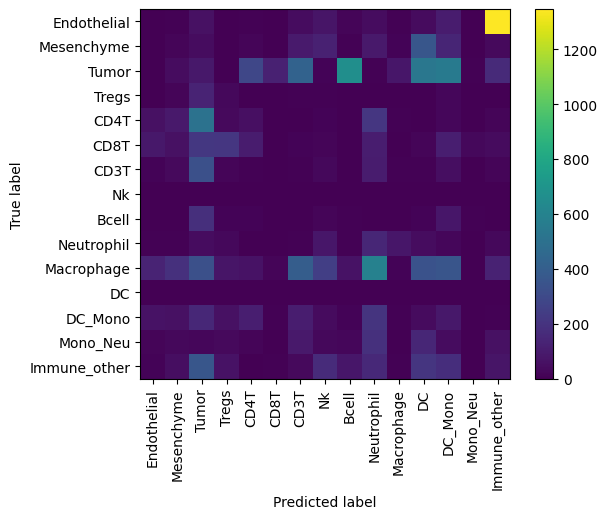

In [44]:
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    np.argmax(y,axis = 1), 
    np.argmax(y_pred, axis = 1), 
    display_labels = labels,
    include_values = False,
    xticks_rotation = 90
)

I save the model parameters to load in later.

In [46]:
torch.save(model.w, 'weight_tensor.pt')